## Summary of the main doc


We have $n=[0,1,2,3,···,N-1]$ as de discrete time index for $S[n]$:


We define $M$ as: 

$$M=max(S[n])+1=37$$

So we can define our root of unity for representing all possible values of $S[n]$ as:

$$\zeta = e^{\frac{2\pi i}{M}}$$

We define a base period for the data to be 12+1

$$ T_o  = 13 $$


We need a reduction factor to bound the size of the plot at the center of the complex plane
$$F_f=\frac{\sqrt{2}}{T_o^2}$$


In the center of the plot we represent the values over time as: 

$$Z[n]=F_f·log_2(n+2)·\zeta^{S[n]}$$


And we have as root of unity for the discrete time index for the selected $T_o$:

$$ \tau = e^{\frac{2\pi i}{T_o}}$$



$$\delta[0]=\delta_0 =\frac{1}{T_o}$$

$$\delta[n] =\begin{cases} \delta_0\space for \space n=0\space mod\space T_o \\
                     0\space for \space n > 0 \space mod\space T_o \\
       \end{cases}$$

$$r[-1]=0$$
$$r[n] = r[n-1] + \delta[n] $$




$$\hat n_{space} = [r[0]·\tau^0, r[1]·\tau^1, r[2]·\tau^2,r[3]·\tau^3,·······,r[11]·\tau^{11},r[12]·\tau^{0},·······]=r[n]·\tau^n$$


$$\hat n[n] =r[n]·\tau^{n}$$





And

$$\psi[n] = \hat n[n]+F_f·\zeta^{S[n]}$$


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import cm
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('roulette_data.csv')
basic_map = pd.read_csv('basic_map2.csv')
data.set_index('n', inplace=True)
basic_map.set_index('X', inplace=True)
S = np.array(data.S.values)
x = np.array(basic_map.x.values)
S_x = np.empty(len(S))
S_x =[x[val] for val in S]
path='biased_six_dice.xls'
# import excel file from path , parsing 'Sheet1'
biased_six_map = pd.read_excel(path,sheet_name='Sheet1')
# Set S as an index in biased_six_map
biased_six_map = biased_six_map.set_index('S')

In [4]:
def get_biased_dice_data(S,start_index,batch_size):
    
    end_index=start_index+batch_size
    nn=np.arange(start_index,end_index)
    S_biased_six_vector=np.empty(nn.size,dtype=int)
    c=0
    for n in nn:
        S_biased_six_vector[c]=biased_six_map['S_biased_six'][S[n]]
        c+=1
    return nn, S_biased_six_vector

In [5]:
plt.rcParams.update({
        "lines.color": "black",
        "patch.edgecolor": "black",
        "text.color": "black",
        "axes.facecolor": "black",
        "axes.edgecolor": "black",
        "axes.labelcolor": "black",
        "xtick.color": "black",
        "ytick.color": "black",
        "grid.color": "black",
        "figure.facecolor": "black",
        "figure.edgecolor": "black",
        "savefig.facecolor": "black",
        "savefig.edgecolor": "black"})

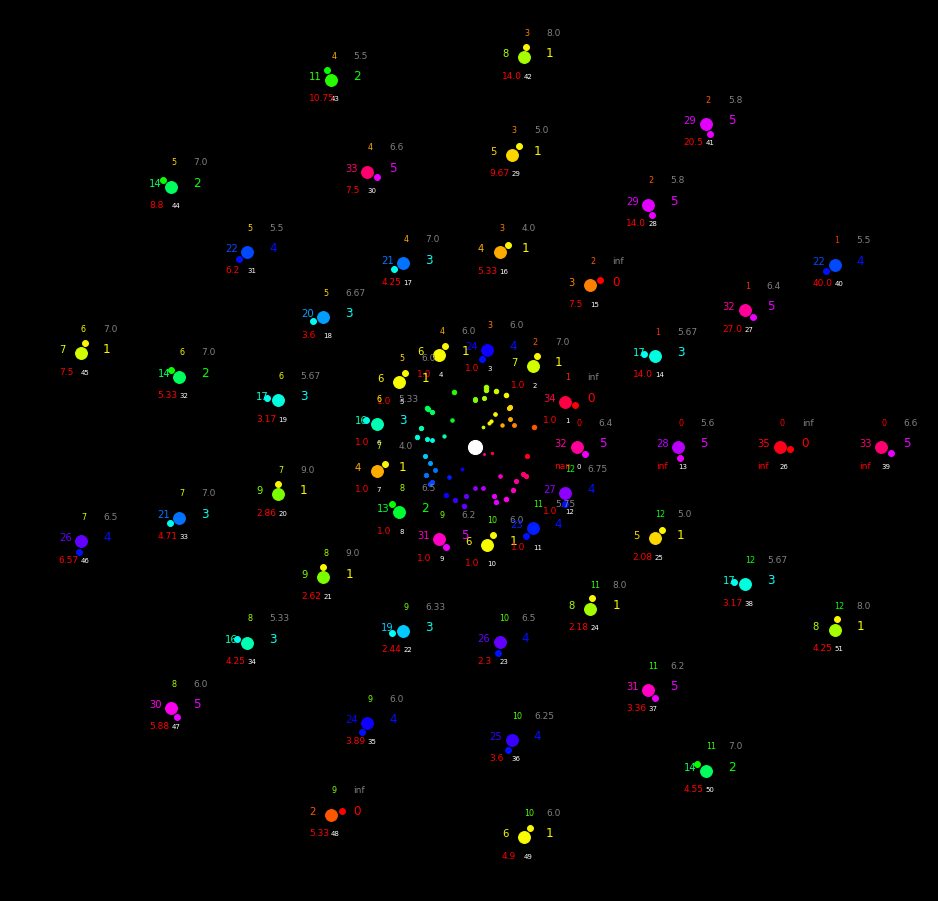

In [6]:

T_o=12+1
start_index = 0
batch_size =T_o*4
input=S[start_index:start_index+batch_size]
M=np.max(input)+1

nn,S_6_input=get_biased_dice_data(input,start_index,batch_size)



c          =0
r_time     =0
r_time_v   =np.zeros(input.size,dtype=float)
zeta_v     =np.zeros(input.size,dtype=complex)
cplx_index =np.zeros(input.size,dtype=complex)
n_mod      =np.zeros(input.size,dtype=int)
X_color = cm.get_cmap('hsv', M)
S_6_X_color = cm.get_cmap('hsv', 7)
ff=np.sqrt(2)/T_o**2

delta      = 1/T_o
w_o        = 2*np.pi/T_o
plt.figure(figsize=(16,16))
png_name='test'

zeta       =np.exp(1j*2*np.pi/M)
for n in np.arange(input.size):
    n_mod[n]=n%T_o
    if n_mod[n]==0:
        r_time_v[n]=r_time_v[n-1]+delta
    else:
        r_time_v[n]=r_time_v[n-1]
    cplx_index[n]=r_time_v[n]*np.exp(1j*w_o*n)
    plt.scatter(cplx_index[n].real,cplx_index[n].imag,color=X_color(input[n]),s=140)
    plt.text(cplx_index[n].real+2*ff,cplx_index[n].imag,str(S_6_input[n]),color=S_6_X_color(S_6_input[n]),fontsize=12)
    plt.text(cplx_index[n].real-2*ff,cplx_index[n].imag,str(input[n]),color=X_color(input[n]),fontsize=10)
    plt.text(cplx_index[n].real,cplx_index[n].imag-2*ff,str(n),color='white',fontsize=7)
    plt.text(cplx_index[n].real,cplx_index[n].imag+2*ff,str(n_mod[n]),color=X_color(n_mod[n]),fontsize=8)
    plt.text(cplx_index[n].real-ff*2,cplx_index[n].imag-ff*2,str(round(n/(n_mod[n]+0),2)),color='red',fontsize=9)
    plt.text(cplx_index[n].real+ff*2,cplx_index[n].imag+ff*2,str(round(input[n]/(S_6_input[n]+0),2)),color='gray',fontsize=9)
    zeta_v[n]=zeta**input[n]
    plt.scatter(ff*np.log2(n+2)*zeta_v[n].real,ff*np.log2(n+2)*zeta_v[n].imag,color=X_color(input[n]),s=np.sqrt(T_o)*np.log2(n+2))
    plt.scatter(cplx_index[n].real+ff*zeta_v[n].real,cplx_index[n].imag+ff*zeta_v[n].imag,color=S_6_X_color(S_6_input[n]),s=35)
    #save a video frame by frame of current plots 
    #plt.savefig(png_name+str(n)+'.png')
    #append frame to animation
plt.scatter(0,0,s=200,c='white')



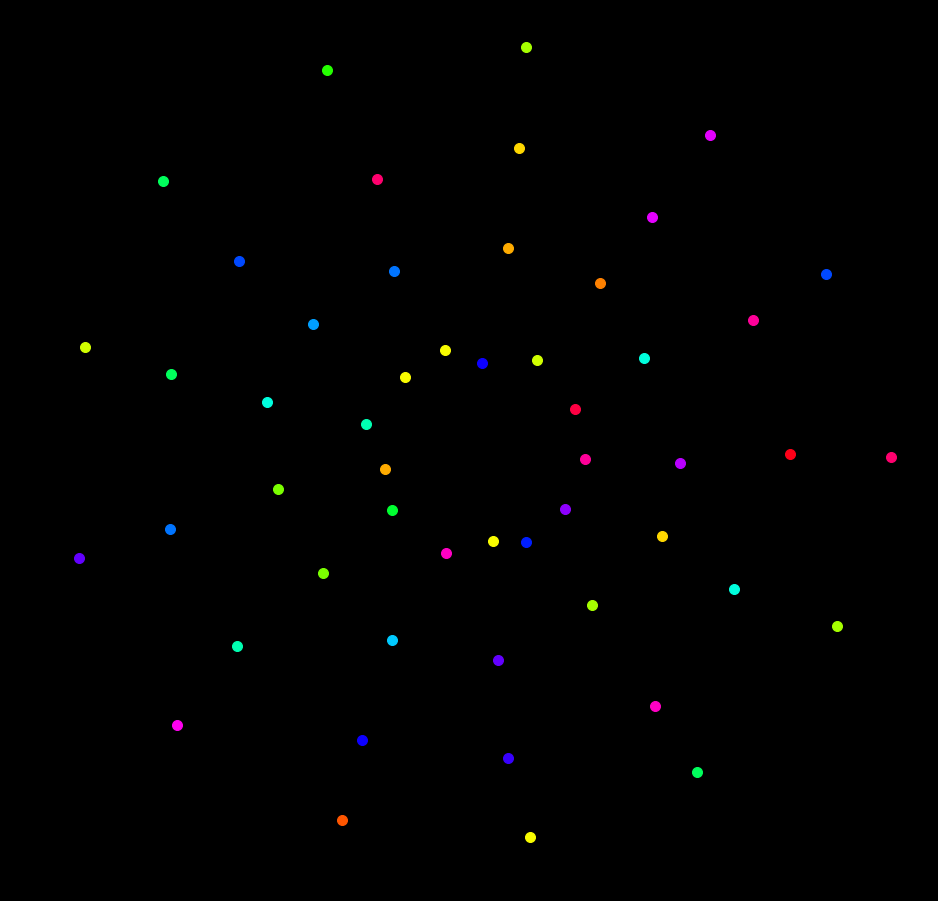

In [7]:
plt.figure(figsize=(16,16))
psi=np.empty(input.size,dtype=complex)
for n in np.arange(input.size):
    psi[n]=cplx_index[n]+ff*zeta**input[n]
    plt.scatter(psi[n].real,psi[n].imag,s=100,color=X_color(input[n]))


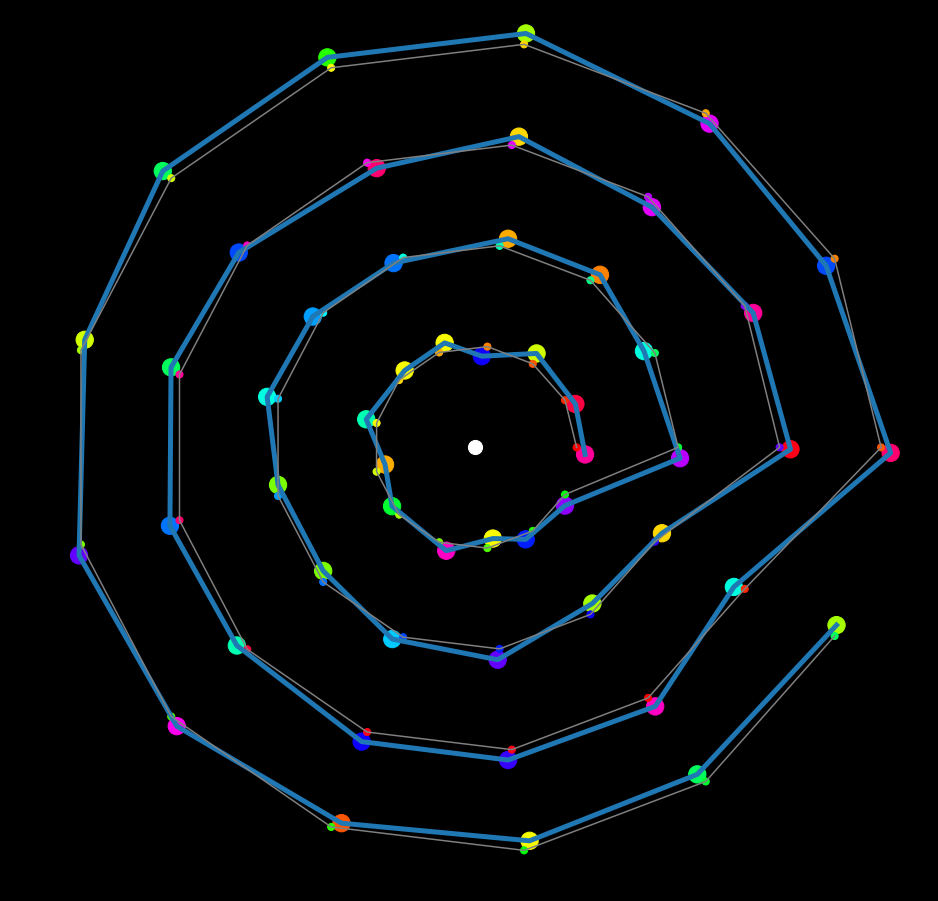

In [11]:

plt.figure(figsize=(16,16))
plt.scatter(psi.real,psi.imag,color=X_color(input),s=300)
plt.plot(psi.real,psi.imag,linewidth=5)
plt.scatter(0,0,s=200,c='white')
plt.axis('equal')
plt.scatter(cplx_index.real,cplx_index.imag,color=X_color(np.mod(nn+37,37)),s=50)
plt.plot(cplx_index.real,cplx_index.imag,color='gray')

# Strange deltas
$$Z_s[n]= K·\zeta^{S[n]}$$
$$\frac{\Delta Z_s[n]}{\Delta \hat n[n]} = K \frac{\zeta^{S[n]}-\zeta^{S[n-1]}}{\hat n[n]-\hat n[n-1]}=\dot Z[n]$$


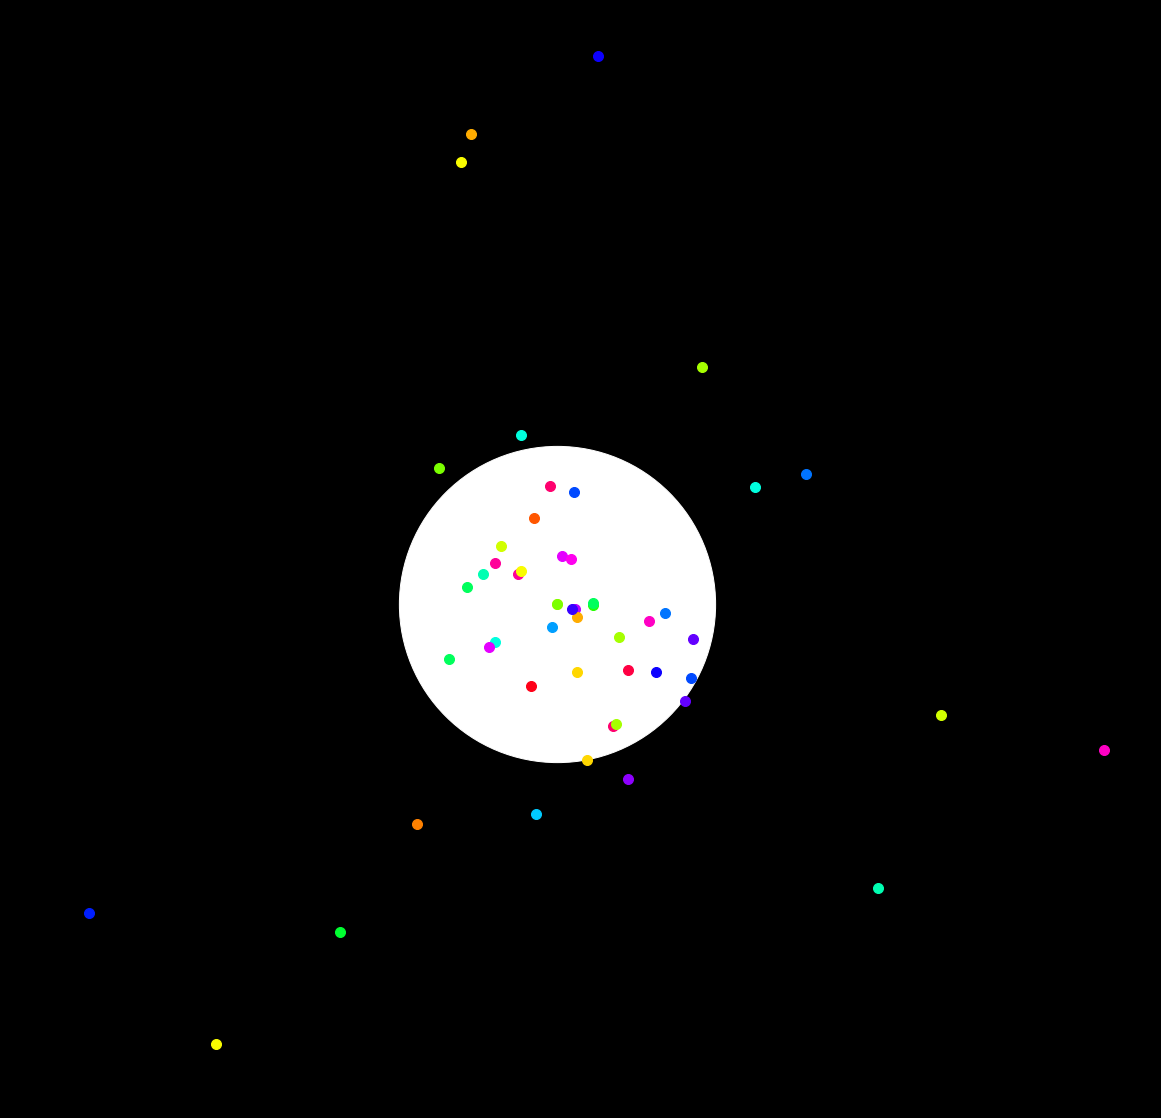

In [9]:
zeta_dot = np.zeros(zeta_v.size,dtype=complex)
K=ff
plt.figure(figsize=(20,20))
plt.scatter(0,0,s=100000,color='white')
for n in np.arange(zeta_v.size):
    zeta_dot[n] =K*(zeta_v[n]-zeta_v[n-1])/(cplx_index[n]-cplx_index[n-1])
    plt.scatter(zeta_dot[n].real,zeta_dot[n].imag,color=X_color(S[n]),s=100)
    